In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
% matplotlib inline
import xgboost as xgb
import gc
import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
transaction_data = pd.read_csv("C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Data/train_2016_v2.csv", parse_dates =["transactiondate"])

In [4]:
transaction_data.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
transaction_data.shape

(90275, 3)

In [6]:
unique_props = len(transaction_data['parcelid'].unique())
multiple_sales = len(transaction_data) - unique_props
print(unique_props)
print(multiple_sales)

90150
125


Of the 90,275 total sales, 90,150 properties are were only sold once and 125 of the properties were sold more than once in 2016.

In [7]:
transaction_data['sale_month'] = transaction_data['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
transaction_data['sale_day'] = transaction_data['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
transaction_data['sale_year'] = transaction_data['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)

In [8]:
transaction_data.head(5)

,parcelid,logerror,transactiondate,sale_month,sale_day,sale_year
0,11016594,0.0276,2016-01-01,1,1,2016
1,14366692,-0.1684,2016-01-01,1,1,2016
2,12098116,-0.0040,2016-01-01,1,1,2016
3,12643413,0.0218,2016-01-02,1,2,2016
4,14432541,-0.0050,2016-01-02,1,2,2016


#### Sales Over Time

Text(0,0.5,'Number of Transactions')

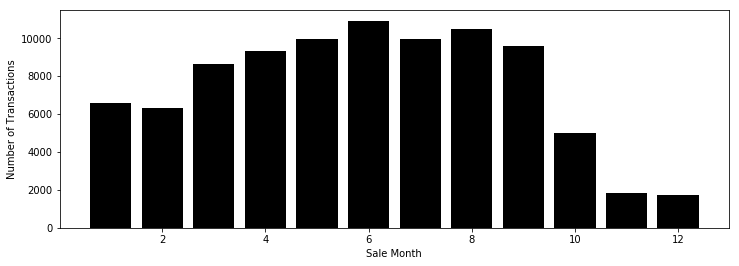

In [9]:
plt.figure(figsize=(12,4))
plt.bar(range(1,13),(transaction_data.groupby('sale_month').count())['parcelid'],color='k')
plt.xlabel('Sale Month')
plt.ylabel('Number of Transactions')

In [10]:
jan_transactions = transaction_data[transaction_data['sale_month'] == 1]['logerror']

In [11]:
jan_transactions.tail

<bound method NDFrame.tail of 0       0.0276
1      -0.1684
2      -0.0040
3       0.0218
4      -0.0050
5      -0.2705
6       0.0440
7       0.1638
8      -0.0030
9       0.0843
10      0.3825
11     -0.0161
12      0.0344
13      0.0816
14     -0.0450
15      0.0020
16      0.0440
17     -0.0419
18     -0.0020
19      0.0100
20     -0.0387
21      0.0218
22      0.0149
23      0.1151
24     -0.1696
25     -0.0440
26     -0.0747
27      0.0080
28      0.0010
29     -0.0534
         ...  
6558    0.0129
6559   -0.0284
6560    0.0169
6561    0.0917
6562    0.0816
6563    0.0373
6564   -0.3496
6565    0.0178
6566   -0.0640
6567   -0.0408
6568   -0.0030
6569   -0.1233
6570    0.0188
6571   -0.0987
6572   -0.0171
6573   -0.0070
6574    0.0227
6575    0.0354
6576    0.0497
6577   -0.0523
6578    0.0440
6579    0.0109
6580    0.0119
6581    0.4240
6582   -0.0111
6583   -0.0050
6584   -0.0387
6585    0.0431
6586   -0.0243
6587   -0.0419
Name: logerror, Length: 6556, dtype: float64>

In [12]:
jan_log_error = np.mean([jan_transactions])
print(np.around(jan_log_error,4))

0.0159


In [13]:
avg_logs_table = []

In [14]:
for i in range(1,13):
    avg_logs = np.mean(transaction_data[transaction_data['sale_month'] == i]['logerror'])
    avg_logs_table.append(avg_logs)
print(avg_logs_table)

[0.015869524100061077, 0.01608212537501983, 0.009866759130836856, 0.006605488132316614, 0.006925880935649025, 0.007172239516572072, 0.011687302704333059, 0.011572814051164615, 0.016255362924282046, 0.016341631504922665, 0.014510131434830202, 0.019122311673375463]


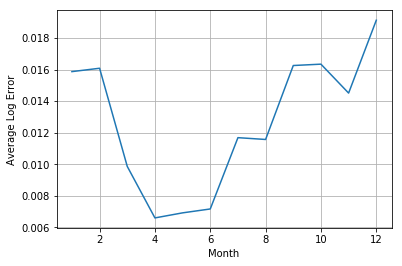

In [15]:
t = range(1,13)
plt.plot(t,avg_logs_table)
plt.xlabel('Month')
plt.ylabel('Average Log Error')
plt.grid(True)

In [16]:
abs_log_error_list = transaction_data[['logerror','sale_month']]
abs_log_error_list['logerror'] = np.abs(abs_log_error_list['logerror'])
abs_log_error_list.head

C:\Users\myang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<bound method NDFrame.head of        logerror  sale_month
0        0.0276           1
1        0.1684           1
2        0.0040           1
3        0.0218           1
4        0.0050           1
5        0.2705           1
6        0.0440           1
7        0.1638           1
8        0.0030           1
9        0.0843           1
10       0.3825           1
11       0.0161           1
12       0.0344           1
13       0.0816           1
14       0.0450           1
15       0.0020           1
16       0.0440           1
17       0.0419           1
18       0.0020           1
19       0.0100           1
20       0.0387           1
21       0.0218           1
22       0.0149           1
23       0.1151           1
24       0.1696           1
25       0.0440           1
26       0.0747           1
27       0.0080           1
28       0.0010           1
29       0.0534           1
...         ...         ...
90245    0.0953          12
90246    0.0139          12
90247    0.2095   

In [17]:
avg_abs_logs_table = []
for i in range(1,13):
    avg_logs = np.mean(abs_log_error_list[abs_log_error_list['sale_month'] == i]['logerror'])
    avg_abs_logs_table.append(avg_logs)
print(avg_abs_logs_table)

[0.07269484441732726, 0.07743447023527479, 0.07204392048081316, 0.06997150681988983, 0.06624098986045543, 0.06615773667826351, 0.06504399316376759, 0.06610425735013294, 0.06727859007832837, 0.06474645368695962, 0.06396522453450172, 0.07595186889016677]


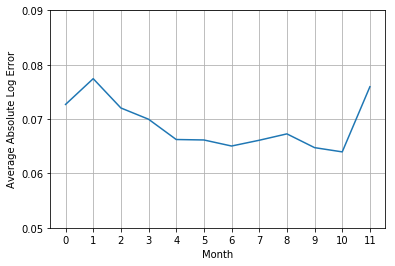

In [18]:
plt.plot(avg_abs_logs_table)
plt.xticks(np.linspace(0,11,12,endpoint=True))
plt.yticks(np.linspace(0.05,0.09,5,endpoint=True))
plt.xlabel('Month')
plt.ylabel('Average Absolute Log Error')
plt.grid(True)

The average absolute log errors are highest in December, January, February and March. These are also months where fewer houses are sold.

In [19]:
import seaborn as sns
# histogram of log error
upper_limit = np.percentile(transaction_data.logerror.values, 99)
lower_limit = np.percentile(transaction_data.logerror.values, 1)

Text(0,0.5,'N')

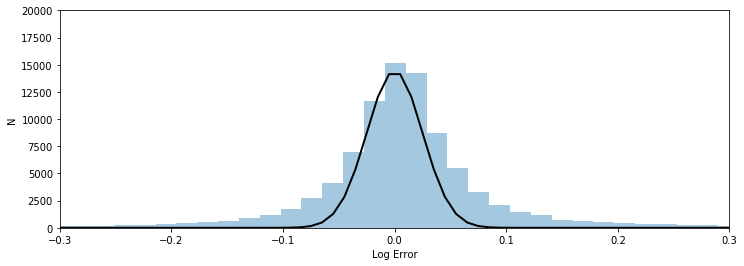

In [20]:
from scipy.stats import norm
plt.figure(figsize=(12,4))
sns.distplot(transaction_data.logerror.values, bins=500, kde=False)
plt.xlabel('Log Error')
mu, std = norm.fit(transaction_data.logerror.values)
xmin,xmax=plt.xlim()
x = np.linspace(-5,5,1000)
p = norm.pdf(x, 0, 0.025)
plt.plot(x, p*(x[1]-x[0])*90275, 'k', linewidth=2)
plt.axis([-0.3,0.3,0,20000])
plt.ylabel('N')

In [21]:
import matplotlib.dates as mdates
from datetime import datetime
transaction_data['transactiondate'] = transaction_data['transactiondate'].astype(datetime)
transaction_data['transactiondate_num'] = mdates.date2num(transaction_data['transactiondate'])

C:\Users\myang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(735964.0, 736328.0)

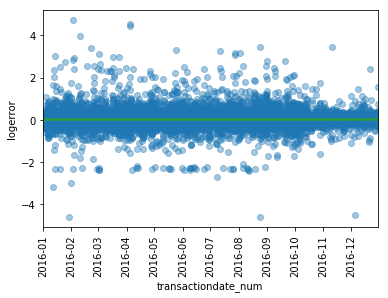

In [22]:
ax = sns.regplot(x='transactiondate_num',
                 y='logerror',
                 data=transaction_data,
                 scatter_kws={'alpha':0.4},
                 line_kws={'color':sns.color_palette()[2]})
plt.xticks(rotation=90)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
ax.set_xlim(np.percentile(transaction_data['transactiondate_num'], 0),
            np.percentile(transaction_data['transactiondate_num'], 100))

In [23]:
property_data = pd.read_csv('C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Data/properties_2016.csv')
property_data.head(5)

C:\Users\myang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


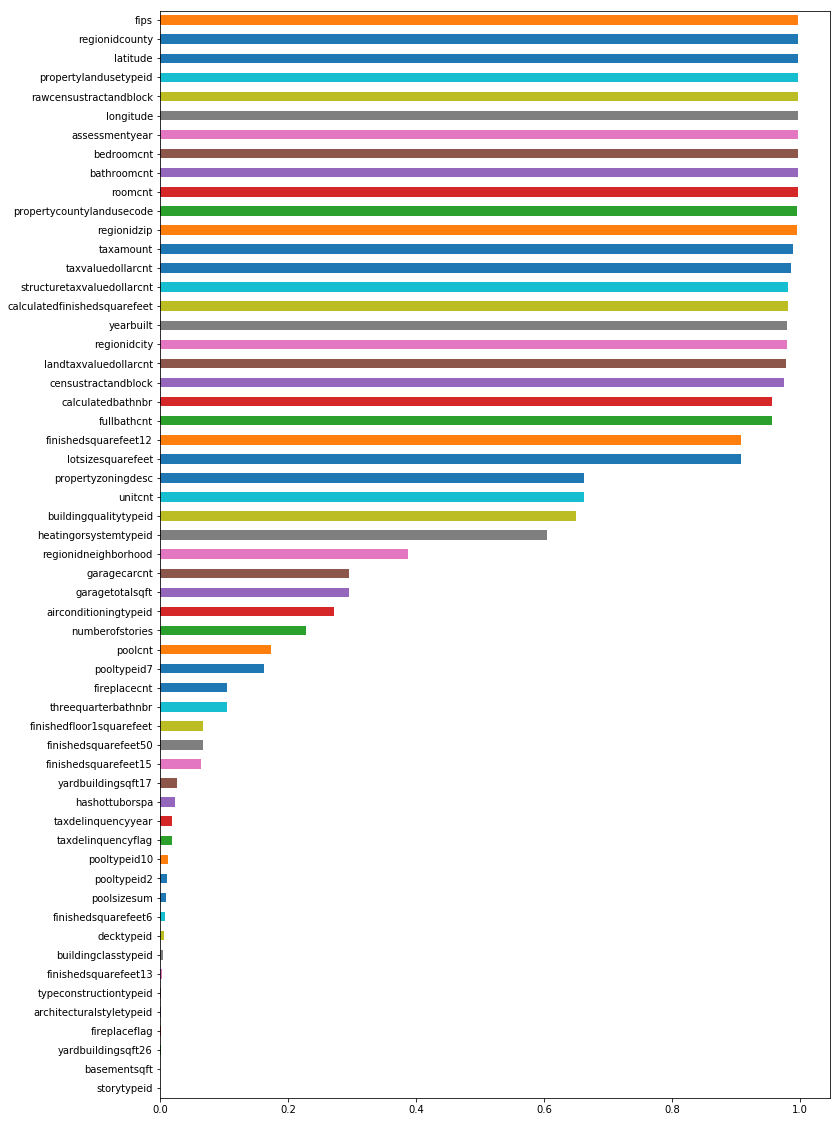

In [24]:
plt.figure(figsize=(12,20))
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')

In [25]:
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = False)

fips                            0.996169
regionidcounty                  0.996169
latitude                        0.996169
propertylandusetypeid           0.996169
rawcensustractandblock          0.996169
longitude                       0.996169
assessmentyear                  0.996168
bedroomcnt                      0.996164
bathroomcnt                     0.996160
roomcnt                         0.996156
propertycountylandusecode       0.995887
regionidzip                     0.995317
taxamount                       0.989532
taxvaluedollarcnt               0.985746
structuretaxvaluedollarcnt      0.981582
calculatedfinishedsquarefeet    0.981387
yearbuilt                       0.979925
regionidcity                    0.978948
landtaxvaluedollarcnt           0.977311
censustractandblock             0.974834
calculatedbathnbr               0.956817
fullbathcnt                     0.956817
finishedsquarefeet12            0.907533
lotsizesquarefeet               0.907511
propertyzoningde

In [26]:
property_data.shape

(2985217, 58)

In [27]:
missing_df = property_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

In [28]:
missing_df.head

<bound method NDFrame.head of                      column_name  missing_count
35        rawcensustractandblock          11437
25                     longitude          11437
24                      latitude          11437
37                regionidcounty          11437
17                          fips          11437
33         propertylandusetypeid          11437
52                assessmentyear          11439
5                     bedroomcnt          11450
4                    bathroomcnt          11462
40                       roomcnt          11475
32     propertycountylandusecode          12277
39                   regionidzip          13980
54                     taxamount          31250
51             taxvaluedollarcnt          42550
50    structuretaxvaluedollarcnt          54982
11  calculatedfinishedsquarefeet          55565
47                     yearbuilt          59928
36                  regionidcity          62845
53         landtaxvaluedollarcnt          67733
57        

In [29]:
missing_df['missing_rate']=missing_df['missing_count']/2985217
cutoff=0.9

In [30]:
property_data.drop(missing_df[(missing_df.missing_rate>=cutoff)].column_name.values.tolist(),
                    axis=1,inplace=True)

In [31]:
property_data.shape

(2985217, 38)

In [32]:
property_data.head

<bound method NDFrame.head of           parcelid  airconditioningtypeid  bathroomcnt  bedroomcnt  \
0         10754147                    NaN          0.0         0.0   
1         10759547                    NaN          0.0         0.0   
2         10843547                    NaN          0.0         0.0   
3         10859147                    NaN          0.0         0.0   
4         10879947                    NaN          0.0         0.0   
5         10898347                    NaN          0.0         0.0   
6         10933547                    NaN          0.0         0.0   
7         10940747                    NaN          0.0         0.0   
8         10954547                    NaN          0.0         0.0   
9         10976347                    NaN          0.0         0.0   
10        11073947                    NaN          0.0         0.0   
11        11114347                    NaN          0.0         0.0   
12        11116947                    NaN          0.0      

#### Light BGM

In [71]:
# Parameters
XGB_WEIGHT = 0.6500
BASELINE_WEIGHT = 0.0056

BASELINE_PRED = 0.0115

In [72]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [109]:
# READ IN RAW DATA
prop = pd.read_csv('C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Data/properties_2016.csv')
train = pd.read_csv("C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Data/train_2016_v2.csv")

C:\Users\myang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
# #Processing data for LightGBM
# for c, dtype in zip(prop.columns, prop.dtypes):
#     if dtype == np.float64:
#         prop[c] = prop[c].astype(np.float32)

In [110]:
df_train = train.merge(prop, how='left', on='parcelid')
df_train.fillna(df_train.median(),inplace = True)

In [108]:
# x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
#                          'propertycountylandusecode', 'fireplacecnt'], axis=1)
# y_train = df_train['logerror'].values
# print(x_train.shape, y_train.shape)

KeyError: "['propertyzoningdesc' 'propertycountylandusecode' 'fireplacecnt'] not found in axis"

In [111]:
def MAE(y, ypred):
    
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

In [112]:
overSampleTestMonths = False
underSampleElseMonths = False

In [113]:
testMonths = [10, 11, 12]

In [114]:
minoritySampleRate = 0.10
majorityReductionRate = 0.2

In [115]:
trainTestMonths = 0.5 # Set to 1 for no validation
trainElseMonths = 0.8 # Set to 1 for no validation

In [116]:
trainValid = (df_train.assign(transactiondate = lambda x: pd.to_datetime(x['transactiondate'])).assign(trans_month = lambda x: x['transactiondate'].dt.month))

In [117]:
trainTestMonths = (trainValid.loc[trainValid['trans_month'].isin(testMonths)].sample(frac = trainTestMonths).index.values)

In [118]:
trainElseMonths = (trainValid.loc[~trainValid['trans_month'].isin(testMonths)].sample(frac = trainElseMonths).index.values)

In [119]:
trainIdx = np.append(trainTestMonths, trainElseMonths)

In [120]:
trainValid = trainValid.drop('trans_month', axis = 1)

In [121]:
train = trainValid.loc[trainIdx, :]

In [122]:
valid = trainValid[np.logical_not(trainValid.index.isin(trainIdx))]

In [123]:
x_valid = valid.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode', 'fireplacecnt'], axis=1)
y_valid = valid['logerror'].values
print(x_valid.shape, y_valid.shape)

(20618, 54) (20618,)


In [129]:
train_columns = x_valid.columns

for c in x_valid.dtypes[x_valid.dtypes == object].index.values:
    x_valid[c] = (x_valid[c] == True)

x_valid = x_valid.values.astype(np.float32, copy=False)
d_train = lgb.Dataset(x_valid, label=y_valid)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [126]:
params = {}
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

In [131]:
clf = lgb.train(params, d_train, 1000)

In [133]:
y_pred = clf.predict(x_valid, num_iteration=clf.best_iteration)
cvAcc = round(MAE(y_valid, y_pred), 5)
print(cvAcc)

0.06707


In [134]:
# Running grid search on parameters
estimator = lgb.LGBMRegressor(num_leaves=31)

In [135]:
param_grid = {'learning_rate': [0.01, 0.1, 1],'n_estimators': [20, 40]}

In [136]:
from sklearn.model_selection import GridSearchCV
gbm = GridSearchCV(estimator, param_grid)

In [137]:
gbm.fit(x_train, y_train)

C:\Users\myang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 20}


In [99]:
# train_columns = x_train.columns

# for c in x_train.dtypes[x_train.dtypes == object].index.values:
#     x_train[c] = (x_train[c] == True)

# del df_train; gc.collect()

# x_train = x_train.values.astype(np.float32, copy=False)
# d_train = lgb.Dataset(x_train, label=y_train)

In [78]:
# ##### RUN LIGHTGBM

# params = {}
# params['max_bin'] = 10
# params['learning_rate'] = 0.0021 # shrinkage_rate
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'regression'
# params['metric'] = 'l1'          # or 'mae'
# params['sub_feature'] = 0.5      # feature_fraction -- OK, back to .5, but maybe later increase this
# params['bagging_fraction'] = 0.85 # sub_row
# params['bagging_freq'] = 40
# params['num_leaves'] = 512        # num_leaf
# params['min_data'] = 500         # min_data_in_leaf
# params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
# params['verbose'] = 0

# print("\nFitting LightGBM model ...")
# clf = lgb.train(params, d_train, 430)

# print("\nPrepare for LightGBM prediction ...")
# print("   Read sample file ...")
# sample = pd.read_csv('C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Data/sample_submission.csv')
# print("   ...")
# sample['parcelid'] = sample['ParcelId']
# print("   Merge with property data ...")
# df_test = sample.merge(prop, on='parcelid', how='left')
# print("   ...")
# print("   ...")
# x_test = df_test[train_columns]
# print("   ...")
# print("   Preparing x_test...")
# for c in x_test.dtypes[x_test.dtypes == object].index.values:
#     x_test[c] = (x_test[c] == True)
# print("   ...")
# x_test = x_test.values.astype(np.float32, copy=False)

# print("\nStart LightGBM prediction ...")
# # num_threads > 1 will predict very slow in kernal
# clf.reset_parameter({"num_threads":1})
# p_test = clf.predict(x_test)


# print( "\nUnadjusted LightGBM predictions:" )
# print( pd.DataFrame(p_test).head() )


Fitting LightGBM model ...

Prepare for LightGBM prediction ...
   Read sample file ...
   ...
   Merge with property data ...
   ...
   ...
   ...
   Preparing x_test...
   ...

Start LightGBM prediction ...

Unadjusted LightGBM predictions:
          0
0  0.037452
1  0.039983
2  0.011359
3  0.008894
4  0.008427


In [ ]:
# ##### PROCESS DATA FOR XGBOOST

# print( "\nProcessing data for XGBoost ...")
# for c in properties.columns:
#     properties[c]=properties[c].fillna(-1)
#     if properties[c].dtype == 'object':
#         lbl = LabelEncoder()
#         lbl.fit(list(properties[c].values))
#         properties[c] = lbl.transform(list(properties[c].values))

# train_df = train.merge(properties, how='left', on='parcelid')
# x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
# x_test = properties.drop(['parcelid'], axis=1)
# # shape        
# print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

# # drop out ouliers
# train_df=train_df[ train_df.logerror > -0.4 ]
# train_df=train_df[ train_df.logerror < 0.418 ]
# x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
# y_train = train_df["logerror"].values.astype(np.float32)
# y_mean = np.mean(y_train)

# print('After removing outliers:')     
# print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


In [ ]:
# ##### RUN XGBOOST

# print("\nSetting up data for XGBoost ...")
# # xgboost params
# xgb_params = {
#     'eta': 0.037,
#     'max_depth': 5,
#     'subsample': 0.80,
#     'objective': 'reg:linear',
#     'eval_metric': 'mae',
#     'lambda': 0.8,   
#     'alpha': 0.4, 
#     'base_score': y_mean,
#     'silent': 1
# }
# # Enough with the ridiculously overfit parameters.
# # I'm going back to my version 20 instead of copying Jayaraman.
# # I want a num_boost_rounds that's chosen by my CV,
# # not one that's chosen by overfitting the public leaderboard.
# # (There may be underlying differences between the train and test data
# #  that will affect some parameters, but they shouldn't affect that.)

# dtrain = xgb.DMatrix(x_train, y_train)
# dtest = xgb.DMatrix(x_test)

# # cross-validation
# #print( "Running XGBoost CV ..." )
# #cv_result = xgb.cv(xgb_params, 
# #                   dtrain, 
# #                   nfold=5,
# #                   num_boost_round=350,
# #                   early_stopping_rounds=50,
# #                   verbose_eval=10, 
# #                   show_stdv=False
# #                  )
# #num_boost_rounds = len(cv_result)

# # num_boost_rounds = 150
# num_boost_rounds = 242
# print("\nXGBoost tuned with CV in:")
# print("   https://www.kaggle.com/aharless/xgboost-without-outliers-tweak ")
# print("num_boost_rounds="+str(num_boost_rounds))

# # train model
# print( "\nTraining XGBoost ...")
# model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

# print( "\nPredicting with XGBoost ...")
# xgb_pred = model.predict(dtest)

# print( "\nXGBoost predictions:" )
# print( pd.DataFrame(xgb_pred).head() )

In [ ]:
# ##### COMBINE PREDICTIONS

# print( "\nCombining XGBoost, LightGBM, and baseline predicitons ..." )
# lgb_weight = 1 - XGB_WEIGHT - BASELINE_WEIGHT
# pred = XGB_WEIGHT*xgb_pred + BASELINE_WEIGHT*BASELINE_PRED + lgb_weight*p_test

# print( "\nCombined predictions:" )
# print( pd.DataFrame(pred).head() )



# ##### WRITE THE RESULTS

# print( "\nPreparing results for write ..." )
# y_pred=[]

# for i,predict in enumerate(pred):
#     y_pred.append(str(round(predict,4)))
# y_pred=np.array(y_pred)

# output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
#         '201610': y_pred, '201611': y_pred, '201612': y_pred,
#         '201710': y_pred, '201711': y_pred, '201712': y_pred})
# # set col 'ParceID' to first col
# cols = output.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# output = output[cols]
# from datetime import datetime

# print( "\nWriting results to disk ..." )
# output.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

# print( "\nFinished ..." )